<img src="https://github.com/UBC-NLP/afrolid/raw/main/images/afrolid_logo.jpg">

AfroLID, a neural LID toolkit for 517 African languages and varieties. AfroLID exploits a multi-domain web dataset manually curated from across 14 language families utilizing five orthographic systems. AfroLID is described in this paper: 
[**AfroLID: A Neural Language Identification Tool for African Languages**](https://arxiv.org/abs/2210.11744).


### Check that the languages ID'd are spoken within East Africa

**ISO for languages spoken in EA**\
English - 'en'\
Swahili - 'sw'\
Ganda - 'lg'\
Kirundi - 'rn'\
French - 'fr'\
Somali - 'so'\
Arabic - 'ar'\
Amharic - 'am'\
Tigrinya - 'ti'\
Kinyarwanda - 'rw'

# LID with AfroLID

In [1]:
!pip install -U git+https://github.com/UBC-NLP/afrolid.git --q

  Preparing metadata (setup.py) ... done


In [2]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! wget https://demos.dlnlp.ai/afrolid/afrolid_model.tar.gz
!tar -xf afrolid_model.tar.gz

--2023-03-06 13:21:48--  https://demos.dlnlp.ai/afrolid/afrolid_model.tar.gz
Resolving demos.dlnlp.ai (demos.dlnlp.ai)... 74.208.236.113, 2607:f1c0:100f:f000::264
Connecting to demos.dlnlp.ai (demos.dlnlp.ai)|74.208.236.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2277022086 (2.1G) [application/gzip]
Saving to: ‚Äòafrolid_model.tar.gz.1‚Äô

afrolid_model.tar.g 100%[===================>]   2.12G  29.4MB/s    in 63s     

2023-03-06 13:22:51 (34.7 MB/s) - ‚Äòafrolid_model.tar.gz.1‚Äô saved [2277022086/2277022086]



In [4]:
import os, sys
import logging
from afrolid.main import classifier
import pandas as pd
import json

In [5]:
logging.basicConfig(
    format="%(asctime)s | %(levelname)s | %(name)s | %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
    level=os.environ.get("LOGLEVEL", "INFO").upper(),
    force=True, # Resets any previous configuration
)
logger = logging.getLogger("afrolid")

cl = classifier(logger, model_path="/content/afrolid_model")


2023-03-06 13:24:04 | INFO | afrolid | Initalizing AfroLID's task and model.


| [input] dictionary: 64001 types
| [label] dictionary: 528 types


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
SA_dir = r'/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/SA-tweets.json'
KEN_dir = r'/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/KEN-tweets.json'
TZ_dir = r'/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/TZ-tweets.json' 

In [8]:
# country specific variables
dir = TZ_dir
country = 'TZ'
allowed_languages = ['en','sw','lg','rn','fr','so','ar','am','ti','rw']

In [9]:
# open json files 
with open(dir, 'r') as f:
    dfs = {k: pd.read_json(v) for k, v in json.load(f).items()}

In [10]:
from tqdm import tqdm
tqdm.pandas()

# Combine all dataframes into one and add a column for the key
df = pd.concat(dfs, keys=dfs.keys())
df = df.reset_index(level=1, drop=True)
df = df.reset_index()
df = df.rename(columns={'index': 'key'})
df.head(3)

key            Datetime             Tweet Id  \
0  daladala 2023-02-08 07:49:38  1623227542218985473   
1  daladala 2023-01-31 13:00:19  1620406624908345344   
2  daladala 2023-01-27 06:19:14  1618856135645356034   

                                                Text        Username  \
0  Dar Es Salaam watu wana hasira sana, ukimgusa ...  fadhilikangusi   
1  Muonekano wa Kituo Kipya cha Daladala cha Kiny...    raphyrodrick   
2  Lakini kumpisha mtu mzima kwenye seat ya dalad...          DejohB   

                   Location  
0  Dar Es Salaam, Tanzania   
1   Dar es Salaam, Tanzania  
2   Dar es Salaam, Tanzania

In [11]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [12]:
from nltk.tokenize import ToktokTokenizer
import re

# clean data and remove punctuation characters
token = ToktokTokenizer()
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

def clean_punct(text):
    words = token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
      punctuation_filtered.append(regex.sub('',w))

    # filtered_list = strip_list_noempty(punctuation_filtered)

    return ' '.join(map(str, punctuation_filtered))
  
df['Text'] = df['Text'].apply(lambda x: clean_punct(x))
df.head(3)


key            Datetime             Tweet Id  \
0  daladala 2023-02-08 07:49:38  1623227542218985473   
1  daladala 2023-01-31 13:00:19  1620406624908345344   
2  daladala 2023-01-27 06:19:14  1618856135645356034   

                                                Text        Username  \
0  Dar Es Salaam watu wana hasira sana  ukimgusa ...  fadhilikangusi   
1  Muonekano wa Kituo Kipya cha Daladala cha Kiny...    raphyrodrick   
2  Lakini kumpisha mtu mzima kwenye seat ya dalad...          DejohB   

                   Location  
0  Dar Es Salaam, Tanzania   
1   Dar es Salaam, Tanzania  
2   Dar es Salaam, Tanzania

## Get LID using AfroLID

In [13]:
whitelist = ['eng', 'swh', 'lug', 'run', 'fra', 'som', 'arb', 'amh', 'tir', 'kin']

In [14]:
def get_afrolid_prediction(text):
  predictions = cl.classify(text, max_outputs=1)
  for lang in predictions:
    if lang in whitelist:
      return lang, predictions[lang]['score'], predictions[lang]['name'], predictions[lang]['script']
    else:
      return 'NA', 0, 'unrecognised', 'NA'

In [15]:
df['predict_iso_afrolid'], df['predict_score_afrolid'], df['predict_name_afrolid'], df['predict_script_afrolid'] = zip(*df['Text'].progress_apply(get_afrolid_prediction))
df.head(3)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 998/998 [13:28<00:00,  1.23it/s]


key            Datetime             Tweet Id  \
0  daladala 2023-02-08 07:49:38  1623227542218985473   
1  daladala 2023-01-31 13:00:19  1620406624908345344   
2  daladala 2023-01-27 06:19:14  1618856135645356034   

                                                Text        Username  \
0  Dar Es Salaam watu wana hasira sana  ukimgusa ...  fadhilikangusi   
1  Muonekano wa Kituo Kipya cha Daladala cha Kiny...    raphyrodrick   
2  Lakini kumpisha mtu mzima kwenye seat ya dalad...          DejohB   

                   Location predict_iso_afrolid  predict_score_afrolid  \
0  Dar Es Salaam, Tanzania                  swh                  99.92   
1   Dar es Salaam, Tanzania                 swh                 100.00   
2   Dar es Salaam, Tanzania                 swh                  99.97   

  predict_name_afrolid predict_script_afrolid  
0              Swahili                  Latin  
1              Swahili                  Latin  
2              Swahili                  Latin

In [16]:
df['predict_name_afrolid'].unique()

array(['Swahili', 'Somali', 'unrecognised', 'Kinyarwanda', 'Luganda'],
      dtype=object)

# LID using CLD3

In [17]:
!pip install pycld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.6/13.6 MB 41.9 MB/s eta 0:00:00


In [18]:
import cld3

allowed_languages = ['en','sw','lg','rn','fr','so','ar','am','ti','rw']

def get_cld3_prediction(text):
  predictions = cld3.get_language(text)
  if predictions.language in allowed_languages:
    return predictions.language, predictions.probability, predictions.proportion, predictions.is_reliable
  else:
    return 'unrecognised', 0, 1.0, False


In [19]:
df['predict_iso_cld3'], df['predict_score_cld3'], df['predict_proportion_cld3'], df['predict_is_reliable_cld3'] = zip(*df['Text'].progress_apply(get_cld3_prediction))
df.head(3)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 998/998 [00:00<00:00, 2063.50it/s]


key            Datetime             Tweet Id  \
0  daladala 2023-02-08 07:49:38  1623227542218985473   
1  daladala 2023-01-31 13:00:19  1620406624908345344   
2  daladala 2023-01-27 06:19:14  1618856135645356034   

                                                Text        Username  \
0  Dar Es Salaam watu wana hasira sana  ukimgusa ...  fadhilikangusi   
1  Muonekano wa Kituo Kipya cha Daladala cha Kiny...    raphyrodrick   
2  Lakini kumpisha mtu mzima kwenye seat ya dalad...          DejohB   

                   Location predict_iso_afrolid  predict_score_afrolid  \
0  Dar Es Salaam, Tanzania                  swh                  99.92   
1   Dar es Salaam, Tanzania                 swh                 100.00   
2   Dar es Salaam, Tanzania                 swh                  99.97   

  predict_name_afrolid predict_script_afrolid predict_iso_cld3  \
0              Swahili                  Latin               sw   
1              Swahili                  Latin               sw   
2              Swahili                  Latin               sw   

   predict_score_cld3  predict_proportion_cld3  predict_is_reliable_cld3  
0            0.999916                      1.0                      True  
1            0.999891                      1.0                      True  
2            0.999998                      1.0                      True

In [20]:
df['predict_iso_cld3'].unique()

array(['sw', 'unrecognised', 'en', 'so', 'fr'], dtype=object)

# LID using Franc

In [21]:
!pip install pyfranc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 262.9/262.9 KB 5.3 MB/s eta 0:00:00


In [22]:
from pyfranc import franc

In [23]:
def get_franc_prediction(text):
  predictions = franc.lang_detect(text, whitelist = whitelist)
  for lang in predictions:
    return predictions[0][0], predictions[0][1]

In [24]:
df['predict_iso_franc'], df['predict_score_franc']= zip(*df['Text'].progress_apply(get_franc_prediction))
df.head(3)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 998/998 [00:02<00:00, 438.99it/s]


key            Datetime             Tweet Id  \
0  daladala 2023-02-08 07:49:38  1623227542218985473   
1  daladala 2023-01-31 13:00:19  1620406624908345344   
2  daladala 2023-01-27 06:19:14  1618856135645356034   

                                                Text        Username  \
0  Dar Es Salaam watu wana hasira sana  ukimgusa ...  fadhilikangusi   
1  Muonekano wa Kituo Kipya cha Daladala cha Kiny...    raphyrodrick   
2  Lakini kumpisha mtu mzima kwenye seat ya dalad...          DejohB   

                   Location predict_iso_afrolid  predict_score_afrolid  \
0  Dar Es Salaam, Tanzania                  swh                  99.92   
1   Dar es Salaam, Tanzania                 swh                 100.00   
2   Dar es Salaam, Tanzania                 swh                  99.97   

  predict_name_afrolid predict_script_afrolid predict_iso_cld3  \
0              Swahili                  Latin               sw   
1              Swahili                  Latin               sw   
2              Swahili                  Latin               sw   

   predict_score_cld3  predict_proportion_cld3  predict_is_reliable_cld3  \
0            0.999916                      1.0                      True   
1            0.999891                      1.0                      True   
2            0.999998                      1.0                      True   

  predict_iso_franc  predict_score_franc  
0               swh                  1.0  
1               swh                  1.0  
2               swh                  1.0

In [25]:
df['predict_iso_franc'].unique()

array(['swh', 'eng', 'som', 'fra', 'lug', 'kin', 'run'], dtype=object)

# Sanity Check

In [26]:
df.head(3)

key            Datetime             Tweet Id  \
0  daladala 2023-02-08 07:49:38  1623227542218985473   
1  daladala 2023-01-31 13:00:19  1620406624908345344   
2  daladala 2023-01-27 06:19:14  1618856135645356034   

                                                Text        Username  \
0  Dar Es Salaam watu wana hasira sana  ukimgusa ...  fadhilikangusi   
1  Muonekano wa Kituo Kipya cha Daladala cha Kiny...    raphyrodrick   
2  Lakini kumpisha mtu mzima kwenye seat ya dalad...          DejohB   

                   Location predict_iso_afrolid  predict_score_afrolid  \
0  Dar Es Salaam, Tanzania                  swh                  99.92   
1   Dar es Salaam, Tanzania                 swh                 100.00   
2   Dar es Salaam, Tanzania                 swh                  99.97   

  predict_name_afrolid predict_script_afrolid predict_iso_cld3  \
0              Swahili                  Latin               sw   
1              Swahili                  Latin               sw   
2              Swahili                  Latin               sw   

   predict_score_cld3  predict_proportion_cld3  predict_is_reliable_cld3  \
0            0.999916                      1.0                      True   
1            0.999891                      1.0                      True   
2            0.999998                      1.0                      True   

  predict_iso_franc  predict_score_franc  
0               swh                  1.0  
1               swh                  1.0  
2               swh                  1.0

In [27]:
# decode the ISO codes to language names for cld3 and franc

import pycountry

def get_language_name_cld3(code):
  try:
    lang = pycountry.languages.get(alpha_2=code)
    return lang.name
  except:
    return 'unrecognised'

df['predict_name_cld3'] = df['predict_iso_cld3'].apply(get_language_name_cld3)
df.head(3)


key            Datetime             Tweet Id  \
0  daladala 2023-02-08 07:49:38  1623227542218985473   
1  daladala 2023-01-31 13:00:19  1620406624908345344   
2  daladala 2023-01-27 06:19:14  1618856135645356034   

                                                Text        Username  \
0  Dar Es Salaam watu wana hasira sana  ukimgusa ...  fadhilikangusi   
1  Muonekano wa Kituo Kipya cha Daladala cha Kiny...    raphyrodrick   
2  Lakini kumpisha mtu mzima kwenye seat ya dalad...          DejohB   

                   Location predict_iso_afrolid  predict_score_afrolid  \
0  Dar Es Salaam, Tanzania                  swh                  99.92   
1   Dar es Salaam, Tanzania                 swh                 100.00   
2   Dar es Salaam, Tanzania                 swh                  99.97   

  predict_name_afrolid predict_script_afrolid predict_iso_cld3  \
0              Swahili                  Latin               sw   
1              Swahili                  Latin               sw   
2              Swahili                  Latin               sw   

   predict_score_cld3  predict_proportion_cld3  predict_is_reliable_cld3  \
0            0.999916                      1.0                      True   
1            0.999891                      1.0                      True   
2            0.999998                      1.0                      True   

  predict_iso_franc  predict_score_franc        predict_name_cld3  
0               swh                  1.0  Swahili (macrolanguage)  
1               swh                  1.0  Swahili (macrolanguage)  
2               swh                  1.0  Swahili (macrolanguage)

In [28]:
iso_langs_EA = {
    'eng': 'English',
    'swh': 'Swahili',
    'lug': 'Ganda',
    'run': 'Kirundi',
    'fra': 'French',
    'som': 'Somali',
    'arb': 'Arabic',
    'amh': 'Amharic',
    'tir': 'Tigrinya',
    'kin': 'Kinyarwanda'
}

def map_language(iso_code):
  return iso_langs_EA.get(iso_code, 'unrecognised')

df['predict_name_franc'] = df['predict_iso_franc'].apply(map_language)
df


key            Datetime             Tweet Id  \
0    daladala 2023-02-08 07:49:38  1623227542218985473   
1    daladala 2023-01-31 13:00:19  1620406624908345344   
2    daladala 2023-01-27 06:19:14  1618856135645356034   
3    daladala 2022-09-24 18:21:32  1573739424382423043   
4    daladala 2022-09-19 09:35:17  1571795051818192898   
..        ...                 ...                  ...   
993     bajaj 2019-03-01 04:42:02  1101341804618690560   
994     bajaj 2019-03-01 04:37:31  1101340668473929728   
995     bajaj 2018-12-21 07:38:29  1076019057890074624   
996     bajaj 2018-07-18 14:49:14  1019594953532600320   
997     bajaj 2018-02-02 08:38:58   959345386237382656   

                                                  Text        Username  \
0    Dar Es Salaam watu wana hasira sana  ukimgusa ...  fadhilikangusi   
1    Muonekano wa Kituo Kipya cha Daladala cha Kiny...    raphyrodrick   
2    Lakini kumpisha mtu mzima kwenye seat ya dalad...          DejohB   
3    Kuna huyu mtu ana hadithia hapa eti anamwaka m...      AsiahSalum   
4    Hongera sana SuluhuSamia kwa Kupata Siti nzuri...   ExMayorUbungo   
..                                                 ...             ...   
993  Tanzania Trade Fair 2019  participation of Baj...      beenakoshy   
994  Bajaj Electricals at the Tanzania trade fair 2...      beenakoshy   
995  In Dar Es Salaam  The Business and Busiest Cit...   mtaliitravels   
996  Safari bora üöó huanza unapoendeshwa kwa Bajaj u...    MondoRide255   
997  Wamiliki wa magari  bajaj na bodaboda mikoa ya...           Sajjo   

                     Location predict_iso_afrolid  predict_score_afrolid  \
0    Dar Es Salaam, Tanzania                  swh                  99.92   
1     Dar es Salaam, Tanzania                 swh                 100.00   
2     Dar es Salaam, Tanzania                 swh                  99.97   
3     Dar es Salaam, Tanzania                 swh                 100.00   
4               Dar es salaam                 swh                 100.00   
..                        ...                 ...                    ...   
993                                           swh                  98.88   
994                                           swh                  99.54   
995   Dar es Salaam, Tanzania                 swh                  85.81   
996   Dar es Salaam, Tanzania                 swh                 100.00   
997        Salt Lake City, UT                 swh                 100.00   

    predict_name_afrolid predict_script_afrolid predict_iso_cld3  \
0                Swahili                  Latin               sw   
1                Swahili                  Latin               sw   
2                Swahili                  Latin               sw   
3                Swahili                  Latin               sw   
4                Swahili                  Latin               sw   
..                   ...                    ...              ...   
993              Swahili                  Latin     unrecognised   
994              Swahili                  Latin               en   
995              Swahili                  Latin               en   
996              Swahili                  Latin               sw   
997              Swahili                  Latin               sw   

     predict_score_cld3  predict_proportion_cld3  predict_is_reliable_cld3  \
0              0.999916                      1.0                      True   
1              0.999891                      1.0                      True   
2              0.999998                      1.0                      True   
3              0.999682                      1.0                      True   
4              0.999171                      1.0                      True   
..                  ...                      ...                       ...   
993            0.000000                      1.0                     False   
994            0.381382                      1.0                   

# Investigating code mixing

In [79]:
# Conduct token level LID

def tokenize_text(text):
  tokens = token.tokenize(text)
  return tokens

def get_token_lid_afrolid(tokens):
  token_lid = []
  for token in tokens:
    predictions = cl.classify(token, max_outputs=1)
    for lang in predictions:
      if lang in whitelist:
        token_lid.append(lang)
  return token_lid

def get_token_lid_cld3(tokens):
  token_lid = []
  for token in tokens:
    predictions = cld3.get_language(token)
    for lang in predictions:
      language_code = predictions.language
      if language_code in allowed_languages:
        token_lid.append(language_code)
  return token_lid

def get_token_lid_franc(tokens):
  token_lid = []
  for token in tokens:
    predictions = franc.lang_detect(token, whitelist = whitelist)
    for lang in predictions:
      token_lid.append(lang[0])
  return token_lid

In [92]:
franc.lang_detect(df['Text'][0], whitelist = whitelist)

[['swh', 1.0],
 ['lug', 0.8657679345209437],
 ['som', 0.7907558979297062],
 ['kin', 0.7751564756860857],
 ['run', 0.7486759749638903],
 ['fra', 0.6198363023591719],
 ['eng', 0.46750120365912373]]

In [85]:
c = df['Text'][0]
get_token_lid_franc(tokenize_text(c))

['und',
 'und',
 'und',
 'und',
 'und',
 'und',
 'und',
 'und',
 'und',
 'und',
 'und',
 'und',
 'und',
 'und',
 'und']

In [57]:
df['afrolid_tokenlid'] = df['Text'].apply(lambda x: get_token_lid_afrolid(tokenize_text(x)))
df

AttributeError: ignored

In [45]:
# create a function to get the majority token-level LID for each text in the dataframe

def get_majority_token_lid(df):
  for tool in lid_tools:
    df[f'{tool}_token_lid'] = df['Text'].apply(lambda x: get_token_lid(x, tool))
  df['afrolid_lang'] = df['afrolid_token_lid']
  df['cld3_lang'] = df['cld3_token_lid']
  df['franc_lang'] = df['franc_token_lid']

  return df

In [46]:
df = get_majority_token_lid(df)
df

2023-03-06 14:32:55 | INFO | afrolid | Input text: Dar


KeyError: ignored

# Majority vote to determine final language label

In [29]:
# group the languages in a new df considering key, tweet ID, datetime, text, location and language names for the different LID tools

df_new = df[['key', 'Datetime', 'Tweet Id', 'Text', 'Username','Location', 'predict_name_afrolid', 'predict_name_cld3', 'predict_name_franc']] 
df_new

key            Datetime             Tweet Id  \
0    daladala 2023-02-08 07:49:38  1623227542218985473   
1    daladala 2023-01-31 13:00:19  1620406624908345344   
2    daladala 2023-01-27 06:19:14  1618856135645356034   
3    daladala 2022-09-24 18:21:32  1573739424382423043   
4    daladala 2022-09-19 09:35:17  1571795051818192898   
..        ...                 ...                  ...   
993     bajaj 2019-03-01 04:42:02  1101341804618690560   
994     bajaj 2019-03-01 04:37:31  1101340668473929728   
995     bajaj 2018-12-21 07:38:29  1076019057890074624   
996     bajaj 2018-07-18 14:49:14  1019594953532600320   
997     bajaj 2018-02-02 08:38:58   959345386237382656   

                                                  Text        Username  \
0    Dar Es Salaam watu wana hasira sana  ukimgusa ...  fadhilikangusi   
1    Muonekano wa Kituo Kipya cha Daladala cha Kiny...    raphyrodrick   
2    Lakini kumpisha mtu mzima kwenye seat ya dalad...          DejohB   
3    Kuna huyu mtu ana hadithia hapa eti anamwaka m...      AsiahSalum   
4    Hongera sana SuluhuSamia kwa Kupata Siti nzuri...   ExMayorUbungo   
..                                                 ...             ...   
993  Tanzania Trade Fair 2019  participation of Baj...      beenakoshy   
994  Bajaj Electricals at the Tanzania trade fair 2...      beenakoshy   
995  In Dar Es Salaam  The Business and Busiest Cit...   mtaliitravels   
996  Safari bora üöó huanza unapoendeshwa kwa Bajaj u...    MondoRide255   
997  Wamiliki wa magari  bajaj na bodaboda mikoa ya...           Sajjo   

                     Location predict_name_afrolid        predict_name_cld3  \
0    Dar Es Salaam, Tanzania               Swahili  Swahili (macrolanguage)   
1     Dar es Salaam, Tanzania              Swahili  Swahili (macrolanguage)   
2     Dar es Salaam, Tanzania              Swahili  Swahili (macrolanguage)   
3     Dar es Salaam, Tanzania              Swahili  Swahili (macrolanguage)   
4               Dar es salaam              Swahili  Swahili (macrolanguage)   
..                        ...                  ...                      ...   
993                                        Swahili             unrecognised   
994                                        Swahili                  English   
995   Dar es Salaam, Tanzania              Swahili                  English   
996   Dar es Salaam, Tanzania              Swahili  Swahili (macrolanguage)   
997        Salt Lake City, UT              Swahili  Swahili (macrolanguage)   

    predict_name_franc  
0              Swahili  
1              Swahili  
2              Swahili  
3              Swahili  
4              Swahili  
..                 ...  
993             French  
994             French  
995            English  
996            Swahili  
997            Swahili  

[998 rows x 9 columns]

In [30]:
df_new.to_csv('/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/{}_tweets_with_LID.csv'.format(country), index=False)

In [31]:
df = pd.read_csv('/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/{}_tweets_with_LID.csv'.format(country))

In [32]:
from collections import Counter

def get_majority_lid(row):
    languages = [row['predict_name_afrolid'], row['predict_name_cld3'], row['predict_name_franc']]
    c = Counter(languages)
    majority_count = c.most_common()[0][1]
    if majority_count > 1:
        return c.most_common()[0][0]
    else:
        return 'undecided'

In [33]:
df['final_language'] = df.apply(get_majority_lid, axis=1)
df

key             Datetime             Tweet Id  \
0    daladala  2023-02-08 07:49:38  1623227542218985473   
1    daladala  2023-01-31 13:00:19  1620406624908345344   
2    daladala  2023-01-27 06:19:14  1618856135645356034   
3    daladala  2022-09-24 18:21:32  1573739424382423043   
4    daladala  2022-09-19 09:35:17  1571795051818192898   
..        ...                  ...                  ...   
993     bajaj  2019-03-01 04:42:02  1101341804618690560   
994     bajaj  2019-03-01 04:37:31  1101340668473929728   
995     bajaj  2018-12-21 07:38:29  1076019057890074624   
996     bajaj  2018-07-18 14:49:14  1019594953532600320   
997     bajaj  2018-02-02 08:38:58   959345386237382656   

                                                  Text        Username  \
0    Dar Es Salaam watu wana hasira sana  ukimgusa ...  fadhilikangusi   
1    Muonekano wa Kituo Kipya cha Daladala cha Kiny...    raphyrodrick   
2    Lakini kumpisha mtu mzima kwenye seat ya dalad...          DejohB   
3    Kuna huyu mtu ana hadithia hapa eti anamwaka m...      AsiahSalum   
4    Hongera sana SuluhuSamia kwa Kupata Siti nzuri...   ExMayorUbungo   
..                                                 ...             ...   
993  Tanzania Trade Fair 2019  participation of Baj...      beenakoshy   
994  Bajaj Electricals at the Tanzania trade fair 2...      beenakoshy   
995  In Dar Es Salaam  The Business and Busiest Cit...   mtaliitravels   
996  Safari bora üöó huanza unapoendeshwa kwa Bajaj u...    MondoRide255   
997  Wamiliki wa magari  bajaj na bodaboda mikoa ya...           Sajjo   

                     Location predict_name_afrolid        predict_name_cld3  \
0    Dar Es Salaam, Tanzania               Swahili  Swahili (macrolanguage)   
1     Dar es Salaam, Tanzania              Swahili  Swahili (macrolanguage)   
2     Dar es Salaam, Tanzania              Swahili  Swahili (macrolanguage)   
3     Dar es Salaam, Tanzania              Swahili  Swahili (macrolanguage)   
4               Dar es salaam              Swahili  Swahili (macrolanguage)   
..                        ...                  ...                      ...   
993                       NaN              Swahili             unrecognised   
994                       NaN              Swahili                  English   
995   Dar es Salaam, Tanzania              Swahili                  English   
996   Dar es Salaam, Tanzania              Swahili  Swahili (macrolanguage)   
997        Salt Lake City, UT              Swahili  Swahili (macrolanguage)   

    predict_name_franc final_language  
0              Swahili        Swahili  
1              Swahili        Swahili  
2              Swahili        Swahili  
3              Swahili        Swahili  
4              Swahili        Swahili  
..                 ...            ...  
993             French      undecided  
994             French      undecided  
995            English        English  
996            Swahili        Swahili  
997            Swahili        Swahili  

[998 rows x 10 columns]

<AxesSubplot:>

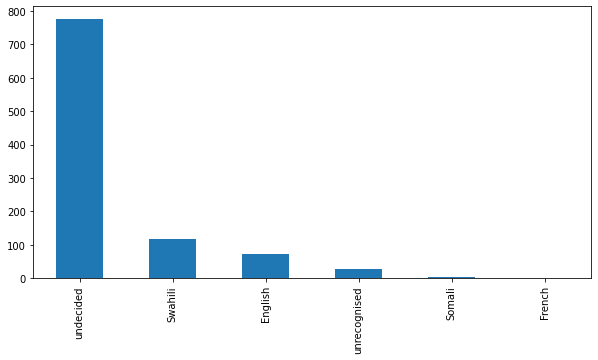

In [34]:
# find the language distribution of the final labels
df['final_language'].value_counts().plot.bar(figsize=(10,5), fontsize=10)

In [35]:
df[df['final_language'] == 'undecided'].sample(10)

key             Datetime             Tweet Id  \
628   bus  2019-11-09 13:46:14  1193162886224502784   
219   bus  2020-03-29 14:43:47  1244274057165635585   
728   bus  2019-10-19 20:31:20  1185654686705172482   
275   bus  2020-03-02 14:27:13  1234485416000212992   
47   dart  2018-06-26 13:30:43  1011602661848813570   
210   bus  2020-04-04 20:59:07  1246542842631258112   
742   bus  2019-10-12 18:33:00  1183088192372838400   
797   bus  2019-09-27 04:46:51  1177444466803691521   
217   bus  2020-03-31 09:30:46  1244920060898148352   
246   bus  2020-03-14 19:18:39  1238907410389110785   

                                                  Text    Username  \
628  ALSAEDY HIGH CLASS alsaedyhighclass DAR ES SAL...  BusWorldTZ   
219  EXTRA LUXURY COACH extraluxurycoach Arusha ‚û≤ D...  BusWorldTZ   
728  MACHINGA HIGH CLASS DAR ES SALAAM‚ûú MTWARA Gold...  BusWorldTZ   
275  BURDAN TOSHA Dar es Salaam ‚ûæ Lushoto ZHONGTONG...  BusWorldTZ   
47   MobilizeDar es una conferencia dise√±ada para a...      ITDPmx   
210  DAR LUX COMPANY LIMITED darluxco HIGER Bus KLQ...  BusWorldTZ   
742  New bus rapid transit under construction in Da...     leepyne   
797  TAYASSAR DAR ES SALAAM ‚ûú TANGA Zhongtong Bus C...  BusWorldTZ   
217  TILISHO SAFARIS tilishosafaris Dar es Salaam ‚ûæ...  BusWorldTZ   
246  SHABIBY LINE shabibyline Dodoma ‚ûû Dar es Salaa...  BusWorldTZ   

                         Location predict_name_afrolid predict_name_cld3  \
628                      Tanzania              Swahili      unrecognised   
219                      Tanzania              Swahili      unrecognised   
728                      Tanzania              Swahili      unrecognised   
275                      Tanzania              Swahili      unrecognised   
47   Esta es la oficina en M√©xico          Kinyarwanda      unrecognised   
210                      Tanzania              Swahili      unrecognised   
742                       Seattle          Kinyarwanda      unrecognised   
797                      Tanzania              Swahili      unrecognised   
217                      Tanzania              Swahili      unrecognised   
246                      Tanzania              Swahili      unrecognised   

    predict_name_franc final_language  
628            English      undecided  
219            English      undecided  
728             French      undecided  
275            English      undecided  
47              French      undecided  
210             French      undecided  
742             French      undecided  
797            English      undecided  
217            English      undecided  
246            English      undecided